<a href="https://colab.research.google.com/github/gabrielfernandorey/GGGR/blob/main/Arboles/SRT%20v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SRT v3 - Ensayo
### Arboles de regresion - Datos reales

In [1]:
import random
import string
import pandas as pd
import numpy as np
from datetime import date

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


### Importamos Datos

In [2]:
!wget https://raw.githubusercontent.com/gabrielfernandorey/GGGR/main/Regresion%20lineal/cod_postal_series.csv

--2023-05-04 18:23:01--  https://raw.githubusercontent.com/gabrielfernandorey/GGGR/main/Regresion%20lineal/cod_postal_series.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2977660 (2.8M) [text/plain]
Saving to: ‘cod_postal_series.csv.1’

cod_postal_series.c 100%[===================>]   2.84M  --.-KB/s    in 0.07s   

2023-05-04 18:23:01 (42.3 MB/s) - ‘cod_postal_series.csv.1’ saved [2977660/2977660]



In [3]:
df = pd.read_csv('/content/cod_postal_series.csv', header=0,
                 names=['codigo','año','mes','total_cp'],
                 dtype={'codigo': str, 'año': str, 'mes': str, 'total_cp': str})

In [4]:
df.head()

,codigo,año,mes,total_cp
0,0,2022.0,1,208
1,0,2022.0,2,185
2,0,2022.0,3,289
3,0,2022.0,4,177
4,0,2022.0,5,177


### EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147066 entries, 0 to 147065
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   codigo    147066 non-null  object
 1   año       147066 non-null  object
 2   mes       147066 non-null  object
 3   total_cp  147066 non-null  object
dtypes: object(4)
memory usage: 4.5+ MB


#### Ajustamos tipo de datos

In [6]:
df['año'] = pd.to_numeric(df['año'], downcast='integer') #corregimos el formato de la columna 

In [7]:
df['mes'] = pd.to_numeric(df['mes']) #corregimos el formato de la columna 

In [8]:
df['total_cp'] = pd.to_numeric(df['total_cp']) #corregimos el formato de la columna 

In [9]:
df.dtypes

codigo      object
año          int16
mes          int64
total_cp     int64
dtype: object

In [10]:
df.head()

,codigo,año,mes,total_cp
0,0,2022,1,208
1,0,2022,2,185
2,0,2022,3,289
3,0,2022,4,177
4,0,2022,5,177


In [11]:
df = df.sort_values(['año','mes'], ascending=True)
df

,codigo,año,mes,total_cp
0,0,2022,1,208
33,01000000,2022,1,19
49,01001000,2022,1,172
65,01002000,2022,1,20
81,01003000,2022,1,7
...,...,...,...,...
146965,Z9050DJG,2023,4,1
146969,Z9303XAT,2023,4,1
146971,Z9310BDE,2023,4,1
146990,Z9400BJA,2023,4,1


#### Verificar cuantos registros tienen el codpos menor a 8 caracteres

In [16]:
df_codigo = df.loc[df['codigo'].apply(lambda x: len(str(x)) < 8)]

#### Verificamos cantidad de registros por codigo

In [17]:
codigos = df.value_counts('codigo')

In [18]:
mayores_a_15 = codigos[codigos > 15]

In [19]:
df = df[df['codigo'].isin(mayores_a_15.index)]

In [20]:
df

,codigo,año,mes,total_cp
0,0,2022,1,208
33,01000000,2022,1,19
49,01001000,2022,1,172
65,01002000,2022,1,20
81,01003000,2022,1,7
...,...,...,...,...
146313,Y4604CJC,2023,4,7
146621,Y4610XAH,2023,4,3
146666,Y4612JYI,2023,4,5
146682,Y4612XAI,2023,4,4


### Transformacion

#### LabelEncoder

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
# Crear una instancia de OneHotEncoder
encoder = LabelEncoder()

In [23]:
# Codificar los valores alfanuméricos
X_encoded = encoder.fit_transform(df.codigo.values.reshape(-1,))

In [24]:
X_encoded.shape

(25440,)

In [25]:
pd.DataFrame(X_encoded)

,0
0,0
1,1
2,2
3,3
4,4
...,...
25435,1585
25436,1586
25437,1587
25438,1588


#### Embeddings

In [26]:
tamano_embedding = 10

In [27]:
matriz_embedding = np.random.rand(len(encoder.classes_), tamano_embedding)

In [28]:
matriz_embedding

array([[0.31822004, 0.48313326, 0.80870596, ..., 0.46993652, 0.36559365,
        0.20765846],
       [0.14053944, 0.79811198, 0.18870105, ..., 0.54044643, 0.78401717,
        0.02677307],
       [0.29846941, 0.97438851, 0.98306088, ..., 0.05862122, 0.81642514,
        0.15920689],
       ...,
       [0.28066143, 0.42184827, 0.19143617, ..., 0.81437275, 0.43134448,
        0.50729251],
       [0.96658797, 0.56390556, 0.98132802, ..., 0.41857422, 0.30602426,
        0.71003826],
       [0.98771253, 0.01742409, 0.93325247, ..., 0.92412441, 0.81852772,
        0.90962748]])

In [29]:
encoder.classes_

array(['0', '01000000', '01001000', ..., 'Y4612JYI', 'Y4612XAI',
       'Z9050DJG'], dtype=object)

In [30]:
# Vectores de embeddings asociados a un valor por cada atributo
atributos_embeddings = matriz_embedding[X_encoded]

In [31]:
atributos_embeddings.shape

(25440, 10)

#### Verificacion embeddings

In [32]:
i = 0
encoder.classes_[i]

'0'

In [33]:
matriz_embedding[i]

array([0.31822004, 0.48313326, 0.80870596, 0.89219571, 0.72835211,
       0.7734704 , 0.3026965 , 0.46993652, 0.36559365, 0.20765846])

In [34]:
matriz_embedding.shape

(1590, 10)

#### Dataframe con datos de embeddings

In [35]:
# Creamos un nuevo dataframe con los valores del embedding
embedding_df = pd.DataFrame(matriz_embedding, columns=[f'emb_{i}' for i in range(matriz_embedding.shape[1])])

In [36]:
embedding_df

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9
0,0.318220,0.483133,0.808706,0.892196,0.728352,0.773470,0.302697,0.469937,0.365594,0.207658
1,0.140539,0.798112,0.188701,0.131406,0.650017,0.586963,0.194857,0.540446,0.784017,0.026773
2,0.298469,0.974389,0.983061,0.588682,0.260609,0.032489,0.198743,0.058621,0.816425,0.159207
3,0.474534,0.901862,0.428543,0.749324,0.974615,0.258208,0.971990,0.313174,0.373476,0.181701
4,0.531154,0.567014,0.765058,0.668944,0.938413,0.502725,0.319036,0.824733,0.538003,0.542079
...,...,...,...,...,...,...,...,...,...,...
1585,0.983037,0.013448,0.902157,0.660044,0.760214,0.669434,0.387521,0.746603,0.477657,0.200398
1586,0.446165,0.731672,0.364083,0.642099,0.570406,0.444001,0.002313,0.357358,0.034972,0.694405
1587,0.280661,0.421848,0.191436,0.463460,0.700485,0.446998,0.825435,0.814373,0.431344,0.507293
1588,0.966588,0.563906,0.981328,0.291512,0.199243,0.319518,0.690684,0.418574,0.306024,0.710038


In [37]:
embedding_df['codigo'] = encoder.classes_

In [38]:
# Utilizamos el codigo como indice (para joinear)
embedding_df = embedding_df.set_index('codigo')
embedding_df

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9
codigo,,,,,,,,,,
0,0.318220,0.483133,0.808706,0.892196,0.728352,0.773470,0.302697,0.469937,0.365594,0.207658
01000000,0.140539,0.798112,0.188701,0.131406,0.650017,0.586963,0.194857,0.540446,0.784017,0.026773
01001000,0.298469,0.974389,0.983061,0.588682,0.260609,0.032489,0.198743,0.058621,0.816425,0.159207
01002000,0.474534,0.901862,0.428543,0.749324,0.974615,0.258208,0.971990,0.313174,0.373476,0.181701
01003000,0.531154,0.567014,0.765058,0.668944,0.938413,0.502725,0.319036,0.824733,0.538003,0.542079
...,...,...,...,...,...,...,...,...,...,...
Y4604CJC,0.983037,0.013448,0.902157,0.660044,0.760214,0.669434,0.387521,0.746603,0.477657,0.200398
Y4610XAH,0.446165,0.731672,0.364083,0.642099,0.570406,0.444001,0.002313,0.357358,0.034972,0.694405
Y4612JYI,0.280661,0.421848,0.191436,0.463460,0.700485,0.446998,0.825435,0.814373,0.431344,0.507293


In [39]:
# Utilizamos el codigo como indice (para joinear)
df = df.set_index('codigo')
df

,año,mes,total_cp
codigo,,,
0,2022,1,208
01000000,2022,1,19
01001000,2022,1,172
01002000,2022,1,20
01003000,2022,1,7
...,...,...,...
Y4604CJC,2023,4,7
Y4610XAH,2023,4,3
Y4612JYI,2023,4,5


In [40]:
df.total_cp.max()

5314

#### Transformar la variable de salida

In [41]:
mmscaler = MinMaxScaler()

In [42]:
df['total_cp'] = mmscaler.fit_transform(df['total_cp'].values.reshape(-1,1))

In [43]:
df.head()

,año,mes,total_cp
codigo,,,
0,2022,1,0.038961
01000000,2022,1,0.003388
01001000,2022,1,0.032185
01002000,2022,1,0.003576
01003000,2022,1,0.001129


#### Joins de Dataframes

In [44]:
df_join = embedding_df.join(df, lsuffix='_izq', rsuffix='_der')
df_join

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,año,mes,total_cp
codigo,,,,,,,,,,,,,
0,0.318220,0.483133,0.808706,0.892196,0.728352,0.773470,0.302697,0.469937,0.365594,0.207658,2022,1,0.038961
0,0.318220,0.483133,0.808706,0.892196,0.728352,0.773470,0.302697,0.469937,0.365594,0.207658,2022,2,0.034632
0,0.318220,0.483133,0.808706,0.892196,0.728352,0.773470,0.302697,0.469937,0.365594,0.207658,2022,3,0.054207
0,0.318220,0.483133,0.808706,0.892196,0.728352,0.773470,0.302697,0.469937,0.365594,0.207658,2022,4,0.033126
0,0.318220,0.483133,0.808706,0.892196,0.728352,0.773470,0.302697,0.469937,0.365594,0.207658,2022,5,0.033126
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z9050DJG,0.987713,0.017424,0.933252,0.666575,0.306335,0.133783,0.665597,0.924124,0.818528,0.909627,2022,12,0.000188
Z9050DJG,0.987713,0.017424,0.933252,0.666575,0.306335,0.133783,0.665597,0.924124,0.818528,0.909627,2023,1,0.000188
Z9050DJG,0.987713,0.017424,0.933252,0.666575,0.306335,0.133783,0.665597,0.924124,0.818528,0.909627,2023,2,0.000941


#### Datos de entrenamiento

In [45]:
df_final = df_join.reset_index()
df_final

,codigo,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,año,mes,total_cp
0,0,0.318220,0.483133,0.808706,0.892196,0.728352,0.773470,0.302697,0.469937,0.365594,0.207658,2022,1,0.038961
1,0,0.318220,0.483133,0.808706,0.892196,0.728352,0.773470,0.302697,0.469937,0.365594,0.207658,2022,2,0.034632
2,0,0.318220,0.483133,0.808706,0.892196,0.728352,0.773470,0.302697,0.469937,0.365594,0.207658,2022,3,0.054207
3,0,0.318220,0.483133,0.808706,0.892196,0.728352,0.773470,0.302697,0.469937,0.365594,0.207658,2022,4,0.033126
4,0,0.318220,0.483133,0.808706,0.892196,0.728352,0.773470,0.302697,0.469937,0.365594,0.207658,2022,5,0.033126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25435,Z9050DJG,0.987713,0.017424,0.933252,0.666575,0.306335,0.133783,0.665597,0.924124,0.818528,0.909627,2022,12,0.000188
25436,Z9050DJG,0.987713,0.017424,0.933252,0.666575,0.306335,0.133783,0.665597,0.924124,0.818528,0.909627,2023,1,0.000188
25437,Z9050DJG,0.987713,0.017424,0.933252,0.666575,0.306335,0.133783,0.665597,0.924124,0.818528,0.909627,2023,2,0.000941
25438,Z9050DJG,0.987713,0.017424,0.933252,0.666575,0.306335,0.133783,0.665597,0.924124,0.818528,0.909627,2023,3,0.000000


In [46]:
X_data = df_final.drop(['codigo','total_cp'], axis=1).to_numpy()

In [47]:
X_data.shape

(25440, 12)

In [48]:
y_data = df_final['total_cp'].to_numpy()

In [49]:
y_data

array([0.03896104, 0.03463203, 0.05420666, ..., 0.00094109, 0.        ,
       0.        ])

In [50]:
X_train, X_test, y_train, y_test = train_test_split( X_data, y_data, test_size=0.30, random_state=43) 

### Modelo

In [51]:
regr_1 = DecisionTreeRegressor(max_depth=5)
regr_2 = DecisionTreeRegressor(max_depth=15)
regr_3 = RandomForestRegressor(max_depth=5)
regr_4 = ExtraTreesRegressor(max_depth=5)

### Entrenamiento

In [52]:
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)
regr_3.fit(X_train, y_train)
regr_4.fit(X_train, y_train)

ExtraTreesRegressor(max_depth=5)

### Validacion

##### DecisionTreeRegressor(max_depth=5)

In [53]:
pred_1_train = regr_1.predict(X_train)
pred_1_test = regr_1.predict(X_test)

In [54]:
mse_1_train = mean_squared_error(y_train, pred_1_train)
mse_1_test  = mean_squared_error(y_test, pred_1_test)

In [55]:
mse_1_train, mse_1_test

(0.0001964401455951669, 0.00014938113728608522)

In [56]:
rmse_1_train = np.sqrt(mse_1_train)
rmse_1_test  = np.sqrt(mse_1_test)
print('RMSE:', round(rmse_1_train,4), round(rmse_1_test,4))

RMSE: 0.014 0.0122


In [57]:
score_1 = r2_score(y_test, pred_1_test)
print(f'R2 score: {score_1:.5f}')

R2 score: 0.26140


##### DecisionTreeRegressor(max_depth=15)

In [58]:
pred_2_train = regr_2.predict(X_train)
pred_2_test = regr_2.predict(X_test)

In [59]:
mse_2_train = mean_squared_error(y_train, pred_2_train)
mse_2_test  = mean_squared_error(y_test, pred_2_test)

In [60]:
mse_2_train, mse_2_test

(5.3344397753410506e-05, 0.00013723111349579282)

In [61]:
rmse_2_train = np.sqrt(mse_2_train)
rmse_2_test  = np.sqrt(mse_2_test)
print('RMSE:', round(rmse_2_train,4), round(rmse_2_test,4))

RMSE: 0.0073 0.0117


In [62]:
score_2 = r2_score(y_test, pred_2_test)
print(f'R2 score: {score_2:.5f}')

R2 score: 0.32147


##### RandomForestRegressor(max_depth=5)

In [63]:
pred_3_train = regr_3.predict(X_train)
pred_3_test = regr_3.predict(X_test)

In [64]:
mse_3_train = mean_squared_error(y_train, pred_3_train)
mse_3_test  = mean_squared_error(y_test, pred_3_test)

In [65]:
mse_3_train, mse_3_test

(0.0001914919101788809, 0.00014655429443630706)

In [66]:
rmse_3_train = np.sqrt(mse_3_train)
rmse_3_test  = np.sqrt(mse_3_test)
print('RMSE:', round(rmse_3_train,4), round(rmse_3_test,4))

RMSE: 0.0138 0.0121


In [67]:
score_3 = r2_score(y_test, pred_3_test)
print(f'R2 score: {score_3:.5f}')

R2 score: 0.27538


##### ExtraTreesRegressor(max_depth=5)

In [68]:
pred_4_train = regr_4.predict(X_train)
pred_4_test = regr_4.predict(X_test)

In [69]:
mse_4_train = mean_squared_error(y_train, pred_4_train)
mse_4_test  = mean_squared_error(y_test, pred_4_test)

In [70]:
mse_4_train, mse_4_test

(0.00023688839349460676, 0.00018838986335201405)

In [71]:
rmse_4_train = np.sqrt(mse_4_train)
rmse_4_test  = np.sqrt(mse_4_test)
print('RMSE:', round(rmse_4_train,4), round(rmse_4_test,4))

RMSE: 0.0154 0.0137


In [72]:
score_4 = r2_score(y_test, pred_4_test)
print(f'R2 score: {score_4:.5f}')

R2 score: 0.06852


### Prediccion

In [73]:
# Ingresar codigo
codigo_in = random.choice(encoder.classes_) 
new_codigo_in = encoder.transform([codigo_in])
new_codigo_embedding = matriz_embedding[new_codigo_in]


In [74]:
# Ingresar año y mes
anio_in = 2023
mes_in = 6

In [75]:
atributos_in = np.concatenate((new_codigo_embedding, anio_in, mes_in), axis=None)

In [76]:
atributos_in = atributos_in.reshape(1, 12)

In [77]:
pred = regr_2.predict(atributos_in)

In [78]:
pred = mmscaler.inverse_transform(pred.reshape(-1, 1))

In [79]:
print(f"Prediccion para el código {codigo_in} Año {anio_in} Mes {mes_in}: {np.round(pred[0][0],2)} incidentes")  

Prediccion para el código 4000000 Año 2023 Mes 6: 137.21 incidentes


### Verificacion grafica

In [80]:
filtro = df_final['codigo'] == codigo_in
df_filtrado = df_final[filtro]
df_filtrado

,codigo,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,año,mes,total_cp
16816,4000000,0.250115,0.866438,0.734523,0.079679,0.872501,0.109794,0.807193,0.579602,0.020308,0.333047,2022,1,0.079992
16817,4000000,0.250115,0.866438,0.734523,0.079679,0.872501,0.109794,0.807193,0.579602,0.020308,0.333047,2022,2,0.025221
16818,4000000,0.250115,0.866438,0.734523,0.079679,0.872501,0.109794,0.807193,0.579602,0.020308,0.333047,2022,3,0.028044
16819,4000000,0.250115,0.866438,0.734523,0.079679,0.872501,0.109794,0.807193,0.579602,0.020308,0.333047,2022,4,0.032938
16820,4000000,0.250115,0.866438,0.734523,0.079679,0.872501,0.109794,0.807193,0.579602,0.020308,0.333047,2022,5,0.036326
16821,4000000,0.250115,0.866438,0.734523,0.079679,0.872501,0.109794,0.807193,0.579602,0.020308,0.333047,2022,6,0.038020
16822,4000000,0.250115,0.866438,0.734523,0.079679,0.872501,0.109794,0.807193,0.579602,0.020308,0.333047,2022,7,0.046678
16823,4000000,0.250115,0.866438,0.734523,0.079679,0.872501,0.109794,0.807193,0.579602,0.020308,0.333047,2022,8,0.044984
16824,4000000,0.250115,0.866438,0.734523,0.079679,0.872501,0.109794,0.807193,0.579602,0.020308,0.333047,2022,9,0.034632
16825,4000000,0.250115,0.866438,0.734523,0.079679,0.872501,0.109794,0.807193,0.579602,0.020308,0.333047,2022,10,0.035197


In [81]:
df_filtrado = df_filtrado.sort_values(['año','mes'], ascending=True)

In [82]:
fechas = []
totales = []

for row in df_filtrado.iterrows():
    fechas.append(str(row[1][11])+'-'+str(row[1][12])+'-01')
    totales.append(row[1][13])

In [83]:
fechas[0]

'2022-1-01'

In [84]:
totales = mmscaler.inverse_transform([totales])

In [85]:
df_graf = pd.DataFrame({'fechas':fechas, 'totales':totales.reshape(-1,)})

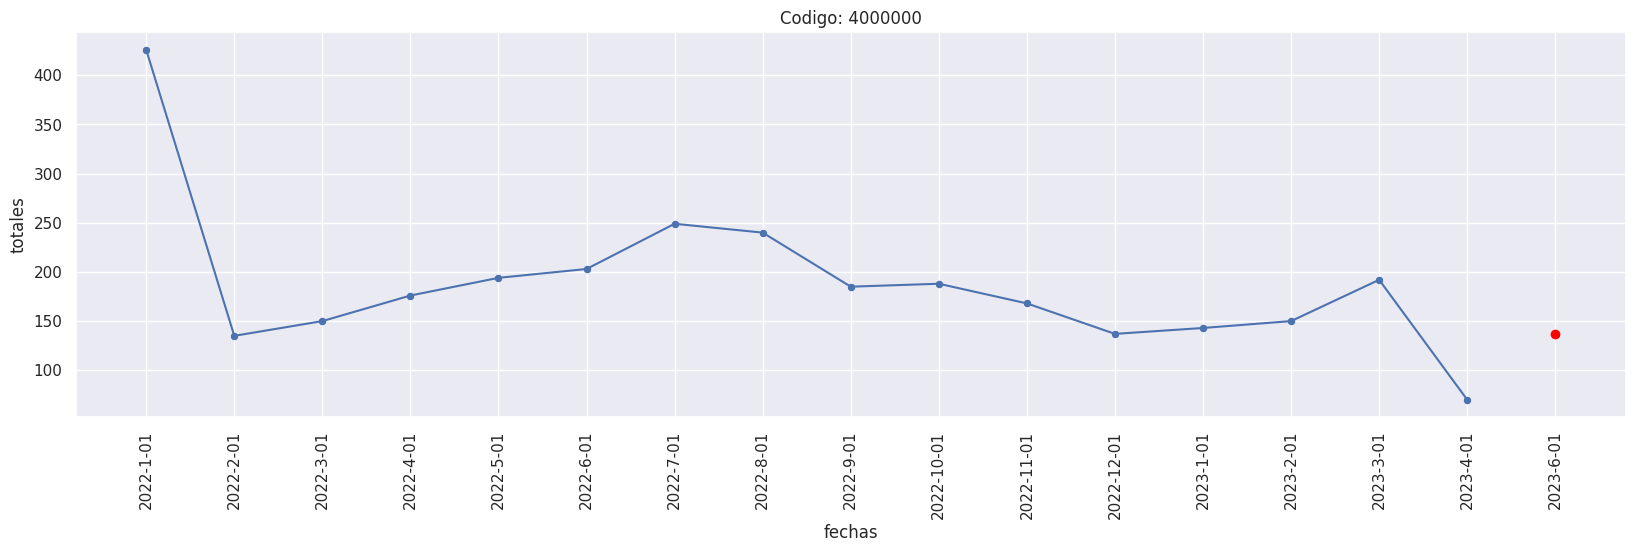

In [86]:
plt.figure(figsize=(20, 5))
sns.set(color_codes=True)
plt.xticks(rotation=90)
sns.scatterplot(x='fechas', y='totales', data=df_graf)
plt.scatter(x=(str(anio_in)+'-'+str(mes_in)+'-01'), y=pred, color='red')
plt.plot(df_graf.fechas, df_graf.totales)
plt.title("Codigo: "+codigo_in)
plt.show()